In [ ]:
#https://www.kaggle.com/lxonline/mnist-example-with-lstm/notebook
#https://www.kaggle.com/tourist55/rnn-on-mnist-with-cuddnlstm-on-gpu-99-acc
#https://www.kaggle.com/kmader/stacked-lstm-for-classification
#https://www.kaggle.com/jamesdhope/recurrent-neural-net-for-mnist-competition
#https://medium.com/machine-learning-algorithms/mnist-using-recurrent-neural-network-2d070a5915a2
#https://data.mendeley.com/datasets/yynb8t9x3d/1
#https://www.youtube.com/watch?v=upo34AT1Cys
#https://medium.com/analytics-vidhya/how-to-choose-the-size-of-the-convolution-filter-or-kernel-size-for-cnn-86a55a1e2d15

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#transfer learning
#https://towardsdatascience.com/the-4-convolutional-neural-network-models-that-can-classify-your-fashion-images-9fe7f3e5399d

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#reading dataset using pandas
data_test = pd.read_csv('/content/drive/MyDrive/TestSAR.csv')
data_train = pd.read_csv('/content/drive/MyDrive/TrainSAR.csv')


img_rows, img_cols = 64, 64
input_shape = (img_rows, img_cols)
#taking the pixel values from the training data. The pixel values start from location 1 in the csv file till the 4096
X = np.array(data_train.iloc[:, 1:])
#convert the label type to the string value
y = to_categorical(np.array(data_train.iloc[:, 0]).astype('str'))

#Here we split validation data to optimiza classifier during training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

#Test data
X_test = np.array(data_test.iloc[:, 1:])
#one hot encoding
y_test = to_categorical(np.array(data_test.iloc[:, 0]))


#X_train.shape=(number of images in the index 0, rowsize, columnsize)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

In [ ]:
print(y_test[100])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(22531, 64, 64)
(9390, 64, 64)
(5633, 64, 64)


In [ ]:
#Dropout and regularization
#https://www.youtube.com/watch?v=XmLYl17DbbA


In [ ]:
#Training Convolutional Neural Network from scratch (VGG)
#Importing Necessary Libraries for training CNN
import keras
import keras.utils
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers.core import Dense, Activation, Dropout
from keras.regularizers import l1

#import tensorflow_addons as tfa
from keras.models import load_model
model2=Sequential()
model2.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu",input_shape=(64,64,1)))
model2.add(MaxPooling2D(pool_size=(2,2),strides=None, padding="same"))

model2.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation ="relu"))
model2.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation ="relu"))
model2.add(MaxPooling2D(pool_size=(2,2),strides=None, padding="same"))
#model2.add(Dropout(0.20))

model2.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model2.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model2.add(MaxPooling2D(pool_size=(2,2),strides=None, padding="same"))

#model2.add(Dropout(0.20))
model2.add(Flatten())
model2.add(Dense(512,activation="relu"))
#model2.add(Dense(64,activation="relu"))
model2.add(Dense(10,activation="softmax"))

#Model Summary
model2.summary()



"""
#Alexnet

model3 =Sequential()
model3.add(layers.experimental.preprocessing.Resizing(128, 128, interpolation="bilinear", input_shape=(64,64,1)))
model3.add(layers.Conv2D(32,kernel_size=(3,3),strides=4, padding='same'))
model3.add(layers.Lambda(tf.nn.local_response_normalization))
model3.add(layers.Activation('relu'))

model3.add(layers.MaxPooling2D(2, strides=2))
model3.add(layers.Conv2D(32,kernel_size=(3,3),strides=4, padding='same'))

model3.add(layers.Lambda(tf.nn.local_response_normalization))
model3.add(layers.Activation('relu'))
model3.add(layers.MaxPooling2D(2, strides=2))
#model3.add(layers.Dropout(0.2))

model3.add(layers.Conv2D(64,kernel_size=(3,3),strides=4, padding='same'))
model3.add(layers.Activation('relu'))

model3.add(layers.Conv2D(64,kernel_size=(3,3),strides=4, padding='same'))
model3.add(layers.Activation('relu'))

model3.add(layers.Conv2D(128,kernel_size=(3,3),strides=4, padding='same'))
model3.add(layers.Activation('relu'))
model3.add(layers.Flatten())

model3.add(layers.Dense(512, activation='relu'))
#model3.add(layers.Dropout(0.2))

model3.add(layers.Dense(1028, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))
#Model Summary of AlexNet Architecture
model3.summary()"""

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       7

'\n#Alexnet\n\nmodel3 =Sequential()\nmodel3.add(layers.experimental.preprocessing.Resizing(128, 128, interpolation="bilinear", input_shape=(64,64,1)))\nmodel3.add(layers.Conv2D(32,kernel_size=(3,3),strides=4, padding=\'same\'))\nmodel3.add(layers.Lambda(tf.nn.local_response_normalization))\nmodel3.add(layers.Activation(\'relu\'))\n\nmodel3.add(layers.MaxPooling2D(2, strides=2))\nmodel3.add(layers.Conv2D(32,kernel_size=(3,3),strides=4, padding=\'same\'))\n\nmodel3.add(layers.Lambda(tf.nn.local_response_normalization))\nmodel3.add(layers.Activation(\'relu\'))\nmodel3.add(layers.MaxPooling2D(2, strides=2))\n#model3.add(layers.Dropout(0.2))\n\nmodel3.add(layers.Conv2D(64,kernel_size=(3,3),strides=4, padding=\'same\'))\nmodel3.add(layers.Activation(\'relu\'))\n\nmodel3.add(layers.Conv2D(64,kernel_size=(3,3),strides=4, padding=\'same\'))\nmodel3.add(layers.Activation(\'relu\'))\n\nmodel3.add(layers.Conv2D(128,kernel_size=(3,3),strides=4, padding=\'same\'))\nmodel3.add(layers.Activation(\'rel

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model3.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
#batch size 32 is the good one for standard image classification
#if the image noisy level is more, then increase the batch size
history3 = model3.fit(X_train, y_train,
              batch_size=32,
              epochs=100,
              verbose=1,
              validation_data=(X_val, y_val))

In [ ]:
loss, accuracy=model2.evaluate(X_test, y_test, verbose=0)
print(accuracy*100)
print(loss)

93.76996755599976
0.4792119562625885


In [ ]:
def save_history(history, fn):
    with open(fn, 'wb') as fw:
        pickle.dump(history.history, fw, protocol=2)

def load_history(fn):
    class Temp():
        pass
    history = Temp()
    with open(fn, 'rb') as fr:
        history.history = pickle.load(fr)
    return history

def jitter(img, amount=32):
    ox, oy = np.random.randint(-amount, amount+1, 2)
    return np.roll(np.roll(img, ox, -1), oy, -2), ox, oy

def reverse_jitter(img, ox, oy):
    return np.roll(np.roll(img, -ox, -1), -oy, -2)

def plot_image(img):
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')

In [ ]:
def smooth_curve(points, factor=0.8):
    smoothed = []
    for point in points:
        if smoothed:
            previous = smoothed[-1]
            smoothed.append(previous * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

In [ ]:
def plot_compare(history, steps=-1):
    if steps < 0:
        steps = len(history.history['accuracy'])
    acc = smooth_curve(history.history['accuracy'][:steps])
    val_acc = smooth_curve(history.history['val_accuracy'][:steps])
    loss = smooth_curve(history.history['loss'][:steps])
    val_loss = smooth_curve(history.history['val_loss'][:steps])

    plt.figure(figsize=(6, 4))
    plt.plot(loss, c='#0c7cba', label='Train Loss')
    plt.plot(val_loss, c='#0f9d58', label='Val Loss')
    plt.xticks(range(0, len(loss), 5))
    plt.xlim(0, len(loss))
    plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
    plt.legend()
    plt.ylabel('Identification accuracy (%)')
    plt.xlabel('Rank',)

    plt.figure(figsize=(6, 4))
    plt.plot(acc, c='#0c7cba', label='Train Acc')
    plt.plot(val_acc, c='#0f9d58', label='Val Acc')
    plt.xticks(range(0, len(acc), 10))
    plt.xlim(0, len(acc))
    plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
    plt.legend()
    plt.ylabel('Identification accuracy (%)')
    plt.xlabel('Rank')

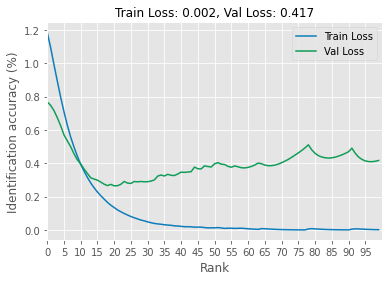

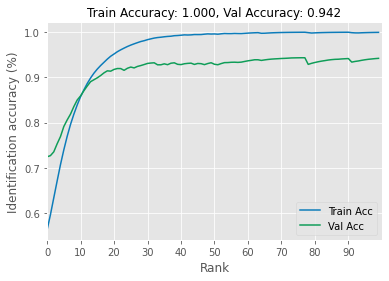

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import os
import pickle
model2.save('Model_Texture.h5')
save_history(history3, 'hist1.bin')
history=load_history('hist1.bin')
plot_compare(history)

findfont: Font family ['Times New Roman Bold'] not found. Falling back to DejaVu Sans.


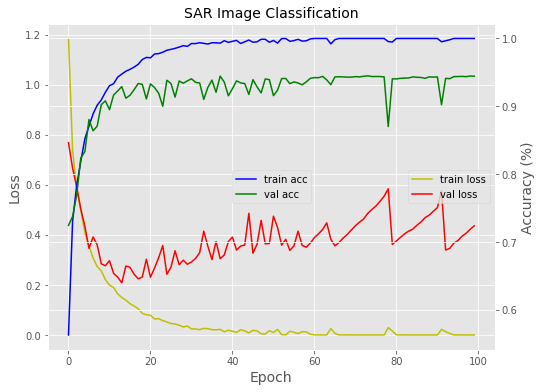

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(8,6))
acc_ax = loss_ax.twinx()

loss_ax.plot(history3.history['loss'], 'y', label='train loss')
loss_ax.plot(history3.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('Epoch',fontname='Times New Roman Bold', fontsize=14)
loss_ax.set_ylabel('Loss',fontname='Times New Roman Bold', fontsize=14)
loss_ax.legend(loc='right')

acc_ax.plot(history3.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history3.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('Accuracy (%)',fontname='Times New Roman Bold', fontsize=14)
acc_ax.set_title('SAR Image Classification',fontname='Times New Roman Bold', fontsize=14)
acc_ax.legend(loc='center')

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
y_hat = model2.predict(X_test)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(y_hat)
print(cm)


[[8.8542290e-18 1.0000000e+00 3.3519817e-17 ... 4.1529895e-37
  3.1623022e-19 2.1775215e-14]
 [0.0000000e+00 4.3065488e-36 4.4416597e-29 ... 4.5817014e-06
  1.1809909e-02 5.7649208e-06]
 [4.7858595e-16 1.0000000e+00 2.8907139e-13 ... 7.8454383e-31
  1.0627371e-12 5.0654419e-13]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.2070179e-31
  0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 1.8281793e-16 2.6049931e-26 ... 1.7046939e-24
  4.7116130e-14 1.5308670e-12]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 2.1982414e-32]]
[[1235    1    0    0    0    0    1    0    0    2]
 [   1 1149   42    0    1    0    0    0    0    4]
 [   0   31 1080    0   47    1    0    1    0    0]
 [   0    0    0 1079    3   14   12   15   11    1]
 [   0    1   49    4 1096   27    4    8    3    1]
 [   0    0    6   24   52  993    9   15    1    0]
 [   3    3    0    7    4   11  452    0    7   12]
 [   0    0    0   15    4   17    0  483   12    0]
 [   0    1 

In [ ]:
#from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import jaccard_score
sim1 = jaccard_score(y_true, y_pred, average=None)
sim1

array([0.99196787, 0.9266129 , 0.85714286, 0.89841799, 0.83536585,
       0.84871795, 0.84644195, 0.82423208, 0.90493601, 0.74474474])

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

confusion_matrix(y_true, y_pred)

array([[1235,    1,    0,    0,    0,    0,    1,    0,    0,    2],
       [   1, 1149,   42,    0,    1,    0,    0,    0,    0,    4],
       [   0,   31, 1080,    0,   47,    1,    0,    1,    0,    0],
       [   0,    0,    0, 1079,    3,   14,   12,   15,   11,    1],
       [   0,    1,   49,    4, 1096,   27,    4,    8,    3,    1],
       [   0,    0,    6,   24,   52,  993,    9,   15,    1,    0],
       [   3,    3,    0,    7,    4,   11,  452,    0,    7,   12],
       [   0,    0,    0,   15,    4,   17,    0,  483,   12,    0],
       [   0,    1,    0,    9,    6,    0,    1,   16,  990,   14],
       [   2,    6,    3,    7,    2,    0,    8,    0,   23,  248]])

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.grid(False)
    plt.show()


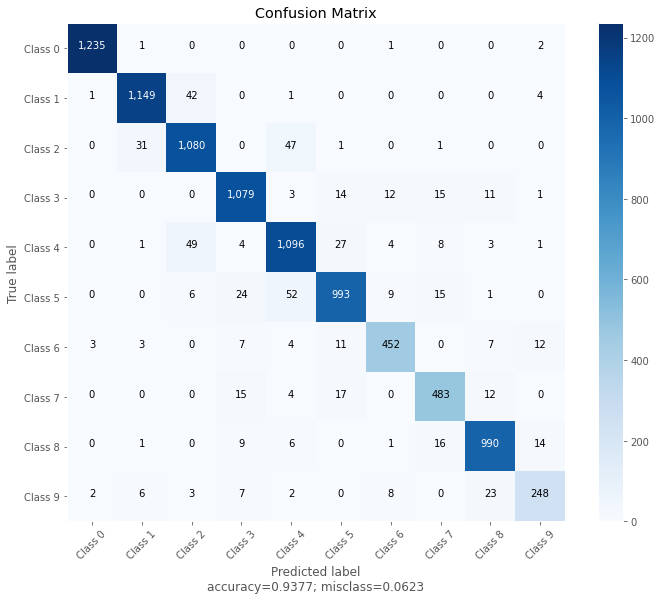

In [ ]:
plot_confusion_matrix(cm,
                      normalize    = False,
                      target_names= ['Class 0','Class 1','Class 2', 'Class 3', 'Class 4', 'Class 5','Class 6','Class 7','Class 8','Class 9'],
                      title        = "Confusion Matrix")

Text(0.5, 33.0, 'Predicted label')

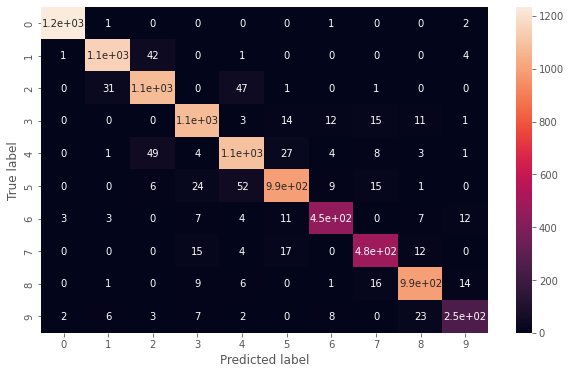

In [ ]:
import seaborn as sns
df_cm=pd.DataFrame(cm)
plt.figure(figsize=(10,6))
sns.heatmap(df_cm,annot=True)
#plt.title("CNN Accuracy:{:6.5f}".format(hist1.history["val_acc"][-1]))
plt.ylabel("True label")
plt.xlabel("Predicted label")

In [ ]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_pred = np.argmax(model2.predict(X_test), axis=1)
y_true1 = np.argmax(y_test, axis=1)
y_true=y_true1.astype(np.int64)

In [ ]:
target_names= ['Class 0','Class 1','Class 2', 'Class 3', 'Class 4', 'Class 5','Class 6','Class 7','Class 8','Class 9']
print(classification_report(y_true, y_pred,target_names=target_names))
print(confusion_matrix(y_true, y_pred))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      1239
     Class 1       0.96      0.96      0.96      1197
     Class 2       0.92      0.93      0.92      1160
     Class 3       0.94      0.95      0.95      1135
     Class 4       0.90      0.92      0.91      1193
     Class 5       0.93      0.90      0.92      1100
     Class 6       0.93      0.91      0.92       499
     Class 7       0.90      0.91      0.90       531
     Class 8       0.95      0.95      0.95      1037
     Class 9       0.88      0.83      0.85       299

    accuracy                           0.94      9390
   macro avg       0.93      0.93      0.93      9390
weighted avg       0.94      0.94      0.94      9390

[[1235    1    0    0    0    0    1    0    0    2]
 [   1 1149   42    0    1    0    0    0    0    4]
 [   0   31 1080    0   47    1    0    1    0    0]
 [   0    0    0 1079    3   14   12   15   11    1]
 [   0    1   49    4 1096   

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision (micro): %f" % precision_score(y_pred, y_true, average='micro'))
print("Recall (micro):    %f" % recall_score(y_pred, y_true, average='micro'))
print("F1 score (micro):  %f" % f1_score(y_pred, y_true, average='micro'), end='\n\n')

print("Precision (macro): %f" % precision_score(y_pred, y_true, average='macro'))
print("Recall (macro):    %f" % recall_score(y_pred, y_true, average='macro'))
print("F1 score (macro):  %f" % f1_score(y_pred, y_true, average='macro'), end='\n\n')

print("Precision (weighted): %f" % precision_score(y_pred, y_true, average='weighted'))
print("Recall (weighted):    %f" % recall_score(y_pred, y_true, average='weighted'))
print("F1 score (weighted):  %f" % f1_score(y_pred, y_true, average='weighted'),end='\n\n')

from sklearn.metrics import cohen_kappa_score
print("kappa_score(micro): %f" % cohen_kappa_score(y_pred, y_true))
print("kappa_score(macro):    %f" % cohen_kappa_score(y_pred, y_true))
print("kappa_score(weighted):  %f" % cohen_kappa_score(y_pred, y_true))

Precision (micro): 0.937700
Recall (micro):    0.937700
F1 score (micro):  0.937700

Precision (macro): 0.925931
Recall (macro):    0.930380
F1 score (macro):  0.928019

Precision (weighted): 0.938027
Recall (weighted):    0.937700
F1 score (weighted):  0.937778

kappa_score(micro): 0.929775
kappa_score(macro):    0.929775
kappa_score(weighted):  0.929775


In [ ]:
score1 = model2.evaluate(X_test, y_test,verbose=1)

print(score1)

y_testpred = model2.predict(X_test)

pred_labels = []
for i in range(10):
    r = np.round(np.array(np.exp(y_hat[i])/sum(np.exp(y_hat[i]))),1).argmax()
    print(r)
    if r ==0 : pred_labels.append("0")
    elif r ==1: pred_labels.append("1")
    elif r ==2: pred_labels.append("2")
    elif r ==3: pred_labels.append("3")
    elif r ==4: pred_labels.append("4")
    elif r ==5: pred_labels.append("5")
    elif r ==6: pred_labels.append("6")
    elif r ==7: pred_labels.append("7")
    elif r ==8: pred_labels.append("8")
    elif r ==9: pred_labels.append("9")
images = X_test[:10]
print(images.shape)
print(type(images))

294/294 [==============================] - 3s 9ms/step - loss: 0.4792 - accuracy: 0.9377
[0.4792119562625885, 0.9376996755599976]
1
3
1
0
2
6
5
8
8
0
(10, 64, 64)
<class 'numpy.ndarray'>


(10, 64, 64)


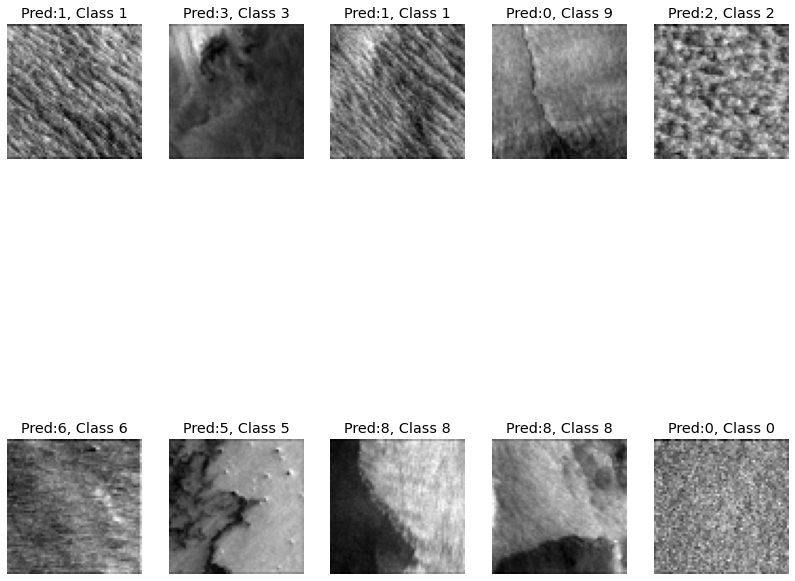

In [ ]:
#Multiple images parameters
import matplotlib.pyplot as plt
w=64
h=64
columns = 5
rows = 2
images = X_test[:10]
print(images.shape)
fig = plt.figure(figsize=(14, 14))
for m in range(1, columns*rows +1):
    img = images[m-1].reshape([64, 64])
    fig.add_subplot(rows, columns, m)
    plt.imshow(img,cmap='gray')
    plt.title("Pred:{}, Class {}".format(pred_labels[m-1], y_true[m-1]))
    #plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.axis('off')
    plt.grid(False)
plt.show()

(9390,) (9390, 10)
Found 1 incorrect labels


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


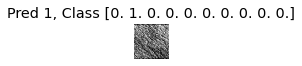

In [ ]:
predicted_classes = model2.predict(X_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
print(predicted_classes.shape,y_test.shape)
incorrect = np.where(predicted_classes!=y_test)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(64,64), interpolation='none', cmap='gray')
    plt.title("Pred {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.grid(False)
    plt.axis('off')
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


Found 0 correct labels
[1 3 1 0 2 6 5 8 8 0 2 1 4 3 3 0 3 2 6 2 5 8 5 0 1 6 3 8 4 0 8 2 3 4 0 5 0
 5 4 1 0 5 2 1 8 1 8 1 1 9 1 1 8 8 3 3 1 3 3 7 8 0 0 0 3 0 0 7 3 0 2 0 1 4
 3 0 5 7 3 4 0 8 2 5 7 3 8 4 4 6 5 9 8 5 3 5 2 3 7 4]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 

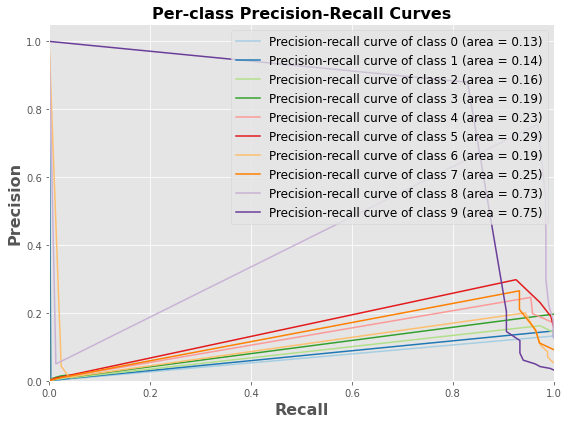

In [ ]:
correct = np.where(predicted_classes==y_test)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(64,64), interpolation='none', cmap='gray')
    plt.title("Pred {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.grid(False)
    plt.axis('off')
    plt.tight_layout()
print(predicted_classes[0:100])
print(y_test[0:100])
from sklearn.metrics import precision_recall_curve, average_precision_score
precision = dict()
recall = dict()
average_precision = dict()
for i in range(10):
    t = y_test[:, i]
    s = y_pred
    precision[i], recall[i], _ = precision_recall_curve(t, s)
    average_precision[i] = average_precision_score(t, s)
# Plot Precision-Recall curve for each class
colors = ('#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928')
fig, ax = plt.subplots(figsize=(8,6))
#ax.set_axis_bgcolor('white')
for cl, co in zip(range(10), colors):
    plt.plot(recall[cl], precision[cl], color=co,
             label='Precision-recall curve of class {} (area = {:.2f})'.format(cl, average_precision[cl]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', size=16, weight='bold')
plt.ylabel('Precision', size=16, weight='bold')
plt.title('Per-class Precision-Recall Curves', size=16, weight='bold')
plt.legend(loc="upper right", prop={'size':12})
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_value, mae_value = model2.evaluate(X_test, y_testpred, verbose=0)
print("Mean Squared Error (MSE)=",mse_value)
print("Mean Absolute Error (MAE)=",mae_value)
print("Mean Squared Error (MSE)=",mean_squared_error(y_testpred, y_test))
print("Mean Absolute Error (MAE)=",mean_absolute_error(y_testpred, y_test))
print ("R^2 is: \n", r2_score(y_test, y_testpred))
print ('RMSE is: \n', np.sqrt(mean_squared_error(y_test, y_testpred)))

Mean Squared Error (MSE)= 0.03123735822737217
Mean Absolute Error (MAE)= 1.0
Mean Squared Error (MSE)= 0.010950256
Mean Absolute Error (MAE)= 0.012827034
R^2 is: 
 0.8625142572409275
RMSE is: 
 0.10464347


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import zipfile
with zipfile.ZipFile("drive/My Drive/Data4.zip","r") as zip_ref:
  zip_ref.extractall()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras import utils as np_utils
%matplotlib inline
train = pd.read_csv('drive/My Drive/Traindata18.csv')
TRAIN_PATH ='Data4/Newdata/'
from PIL import Image
from imageio import imread
from skimage.transform import resize
import cv2
from tqdm import tqdm
# defining a function to read images
def read_img(img_path):
  img = image.load_img(img_path, target_size=[64,64,1],grayscale=True)
  #img = img.convert(mode='RGB') #makes 3 channels
  img = image.img_to_array(img)
  img = img/255
  return img
# reading the images
train_img = []
for img_path in tqdm(train.Image.values):
  train_img.append(read_img(TRAIN_PATH + img_path))

  0%|          | 0/10772 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(
100%|██████████| 10772/10772 [00:03<00:00, 2782.43it/s]


In [ ]:
import keras
from keras import utils as np_utils
X_train = np.array(train_img)
print("Length of total input:",len(X_train))
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb.fit(train.Label.values)
Y_train = lb.transform(train.Label.values)
Y_train=Y_train.astype(np.int32)
Y_train = keras.utils.np_utils.to_categorical(Y_train)
split_size = int(X_train.shape[0]*0.8)
x_train, x_test = X_train[:split_size], X_train[split_size:]
y_train, y_test = Y_train[:split_size], Y_train[split_size:]
print(x_train.shape, x_test.shape,)
print(y_train.shape, y_test.shape)
print(len(y_test))

Length of total input: 10772
(8617, 64, 64, 3) (2155, 64, 64, 3)
(8617, 10) (2155, 10)
2155


In [ ]:
print(y_test[1:5])
image_shape = x_train.shape[1:]
n_classes = y_train.shape[1]
print("Number of training examples =", x_train.shape[0])
print("Number of testing examples =", x_test.shape[0])
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
img_rows, img_cols = 64, 64
input_shape = (img_rows, img_cols, 1)

In [ ]:
#Alexnet
import tensorflow as tf
import keras
import keras.utils
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers.core import Dense, Activation, Dropout
from keras.regularizers import l1
model3 =Sequential()
model3.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=(64,64,1)))
model3.add(layers.Conv2D(32,kernel_size=(3,3),strides=4, padding='same',input_shape=(64,64,1)))
model3.add(layers.Lambda(tf.nn.local_response_normalization))
model3.add(layers.Activation('relu'))

model3.add(layers.MaxPooling2D(2, strides=2))
model3.add(layers.Conv2D(32,kernel_size=(3,3),strides=4, padding='same'))

model3.add(layers.Lambda(tf.nn.local_response_normalization))
model3.add(layers.Activation('relu'))
model3.add(layers.MaxPooling2D(2, strides=2))
#model3.add(layers.Dropout(0.2))

model3.add(layers.Conv2D(64,kernel_size=(3,3),strides=4, padding='same'))
model3.add(layers.Activation('relu'))

model3.add(layers.Conv2D(64,kernel_size=(3,3),strides=4, padding='same'))
model3.add(layers.Activation('relu'))

model3.add(layers.Conv2D(128,kernel_size=(3,3),strides=4, padding='same'))
model3.add(layers.Activation('relu'))
model3.add(layers.Flatten())

model3.add(layers.Dense(512, activation='relu'))
#model3.add(layers.Dropout(0.2))

model3.add(layers.Dense(1028, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))
#Model Summary of AlexNet Architecture
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 32)        320       
                                                                 
 lambda (Lambda)             (None, 56, 56, 32)        0         
                                                                 
 activation (Activation)     (None, 56, 56, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 32)          9248      
                                                        

In [ ]:
import keras
import keras.utils
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers.core import Dense, Activation, Dropout
from keras.regularizers import l1

#import tensorflow_addons as tfa
from keras.models import load_model
model2=Sequential()
model2.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu",input_shape=(64,64,1)))
model2.add(MaxPooling2D(pool_size=(2,2),strides=None, padding="same"))

model2.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation ="relu"))
model2.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation ="relu"))
model2.add(MaxPooling2D(pool_size=(2,2),strides=None, padding="same"))
#model2.add(Dropout(0.20))

model2.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model2.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model2.add(MaxPooling2D(pool_size=(2,2),strides=None, padding="same"))

#model2.add(Dropout(0.20))
model2.add(Flatten())
model2.add(Dense(512,activation="relu"))
#model2.add(Dense(64,activation="relu"))
model2.add(Dense(10,activation="softmax"))

#Model Summary
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 128)      

In [ ]:
'''from tensorflow.keras.optimizers import Adam
model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,),
              metrics=['accuracy'])'''

from tensorflow.keras.optimizers import Adam
model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam( learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",),
               metrics=['accuracy'])

In [ ]:
history3 = model3.fit(x_train, y_train,
          batch_size=32, epochs=100, verbose=1, validation_data=(x_test, y_test))


Epoch 1/100
270/270 [==============================] - 19s 28ms/step - loss: 1.8690 - accuracy: 0.2834 - val_loss: 1.5338 - val_accuracy: 0.3995
Epoch 2/100
270/270 [==============================] - 8s 29ms/step - loss: 1.3527 - accuracy: 0.5008 - val_loss: 0.9858 - val_accuracy: 0.6357
Epoch 3/100
270/270 [==============================] - 7s 26ms/step - loss: 0.9472 - accuracy: 0.6574 - val_loss: 0.7750 - val_accuracy: 0.7248
Epoch 4/100
270/270 [==============================] - 8s 29ms/step - loss: 0.7909 - accuracy: 0.7060 - val_loss: 0.7167 - val_accuracy: 0.7401
Epoch 5/100
270/270 [==============================] - 7s 27ms/step - loss: 0.7501 - accuracy: 0.7266 - val_loss: 0.6813 - val_accuracy: 0.7601
Epoch 6/100
270/270 [==============================] - 8s 29ms/step - loss: 0.6764 - accuracy: 0.7510 - val_loss: 0.6046 - val_accuracy: 0.7791
Epoch 7/100
270/270 [==============================] - 8s 29ms/step - loss: 0.6368 - accuracy: 0.7605 - val_loss: 0.5775 - val_accuracy

In [ ]:
loss, accuracy=model3.evaluate(x_test, y_test, verbose=0)
print(accuracy*100)
print(loss)

90.39443135261536
0.5187455415725708


In [ ]:
def save_history(history, fn):
    with open(fn, 'wb') as fw:
        pickle.dump(history.history, fw, protocol=2)

def load_history(fn):
    class Temp():
        pass
    history = Temp()
    with open(fn, 'rb') as fr:
        history.history = pickle.load(fr)
    return history

def jitter(img, amount=32):
    ox, oy = np.random.randint(-amount, amount+1, 2)
    return np.roll(np.roll(img, ox, -1), oy, -2), ox, oy

def reverse_jitter(img, ox, oy):
    return np.roll(np.roll(img, -ox, -1), -oy, -2)

def plot_image(img):
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')

In [ ]:
def plot_compare(history, steps=-1):
    if steps < 0:
        steps = len(history.history['accuracy'])
    acc = smooth_curve(history.history['accuracy'][:steps])
    val_acc = smooth_curve(history.history['val_accuracy'][:steps])
    loss = smooth_curve(history.history['loss'][:steps])
    val_loss = smooth_curve(history.history['val_loss'][:steps])

    plt.figure(figsize=(6, 4))
    plt.plot(loss, c='#0c7cba', label='Train Loss')
    plt.plot(val_loss, c='#0f9d58', label='Val Loss')
    plt.xticks(range(0, len(loss), 5))
    plt.xlim(0, len(loss))
    plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
    plt.legend()
    plt.ylabel('Identification accuracy (%)')
    plt.xlabel('Rank',)

    plt.figure(figsize=(6, 4))
    plt.plot(acc, c='#0c7cba', label='Train Acc')
    plt.plot(val_acc, c='#0f9d58', label='Val Acc')
    plt.xticks(range(0, len(acc), 10))
    plt.xlim(0, len(acc))
    plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
    plt.legend()
    plt.ylabel('Identification accuracy (%)')
    plt.xlabel('Rank')

In [ ]:
def smooth_curve(points, factor=0.8):
    smoothed = []
    for point in points:
        if smoothed:
            previous = smoothed[-1]
            smoothed.append(previous * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

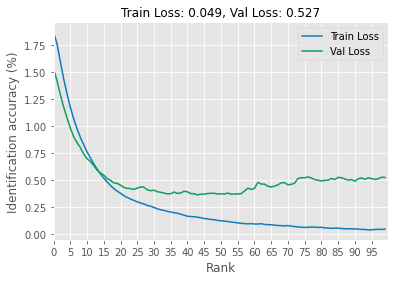

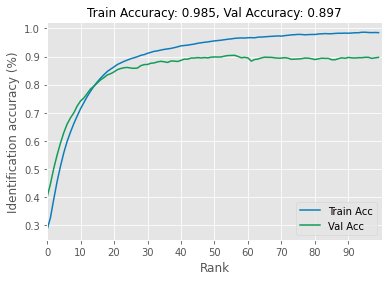

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import os
import pickle
model3.save('Model_Texture_Alexnet.h5')
save_history(history3, 'hist1.bin')
history=load_history('hist1.bin')
plot_compare(history)

findfont: Font family ['Times New Roman Bold'] not found. Falling back to DejaVu Sans.


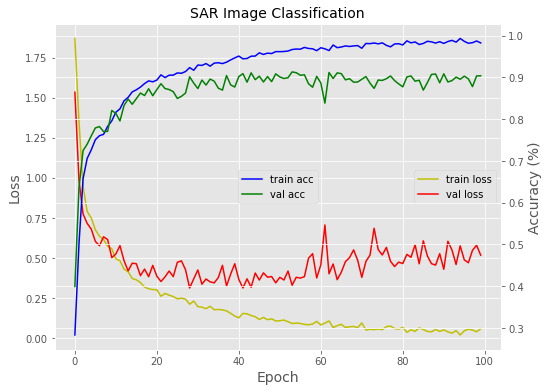

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(8,6))
acc_ax = loss_ax.twinx()

loss_ax.plot(history3.history['loss'], 'y', label='train loss')
loss_ax.plot(history3.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('Epoch',fontname='Times New Roman Bold', fontsize=14)
loss_ax.set_ylabel('Loss',fontname='Times New Roman Bold', fontsize=14)
loss_ax.legend(loc='right')

acc_ax.plot(history3.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history3.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('Accuracy (%)',fontname='Times New Roman Bold', fontsize=14)
acc_ax.set_title('SAR Image Classification',fontname='Times New Roman Bold', fontsize=14)
acc_ax.legend(loc='center')

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
y_hat = model3.predict(x_test)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(y_hat)
print(cm)

[[1.1683390e-03 1.0728795e-04 1.3931238e-14 ... 5.4542196e-15
  1.0964037e-06 2.4672275e-02]
 [2.0948060e-04 9.3851739e-11 6.9451056e-11 ... 2.8412301e-06
  7.2696624e-16 4.9025311e-05]
 [2.7617747e-10 1.0638838e-05 8.4152854e-09 ... 7.5614695e-11
  4.9236714e-05 1.0627779e-04]
 ...
 [7.2444641e-27 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.7804066e-18]
 [3.3203560e-25 1.5690913e-15 1.0000000e+00 ... 6.8650446e-20
  3.2576709e-20 0.0000000e+00]
 [3.2472381e-05 9.9063182e-01 6.1385340e-06 ... 2.5756356e-16
  8.6176777e-03 6.2933281e-10]]
[[140   7   1   0   1   4   0   0   0   0]
 [ 10  63   4   0  15   0   2   0  11   0]
 [  0   2 218   1   1   0   1   0   2   0]
 [  0   0  12 181   5   0   5   6   0   1]
 [  2  12   0   4 146   0   6   0   2   1]
 [  4   0   0   0   0 286   3   0   0   3]
 [  1   0   7   5   9   1 277   0   2   1]
 [  0   0   0  11   0   3   0 284   0   3]
 [  1  11   0   0   3   0   4   0 199   1]
 [  3   0   0   0   5   2   4   2   0 154]]


In [ ]:
from sklearn.metrics import jaccard_score
sim1 = jaccard_score(y_true, y_pred, average=None)
sim1

array([0.8045977 , 0.45985401, 0.87550201, 0.78354978, 0.68867925,
       0.93464052, 0.8445122 , 0.91909385, 0.84322034, 0.85555556])

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.grid(False)
    plt.show()


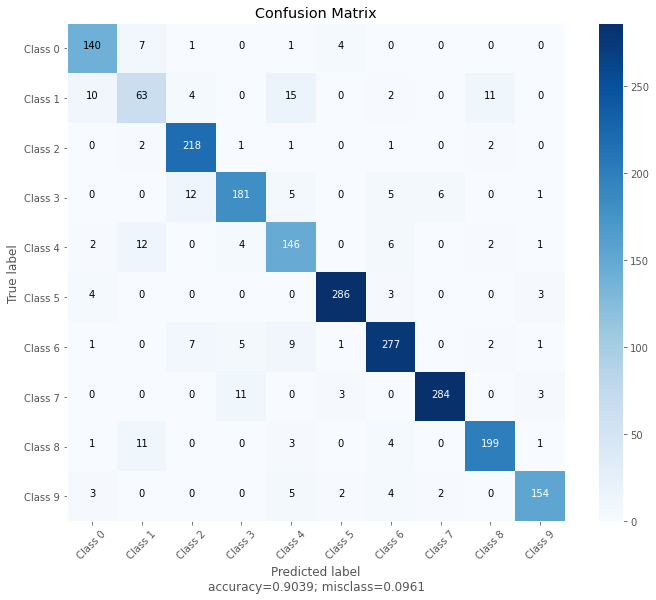

In [ ]:
plot_confusion_matrix(cm,
                      normalize    = False,
                      target_names= ['Class 0','Class 1','Class 2', 'Class 3', 'Class 4', 'Class 5','Class 6','Class 7','Class 8','Class 9'],
                      title        = "Confusion Matrix")

In [ ]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_pred = np.argmax(model3.predict(x_test), axis=1)
y_true1 = np.argmax(y_test, axis=1)
y_true=y_true1.astype(np.int64)
target_names= ['Class 0','Class 1','Class 2', 'Class 3', 'Class 4', 'Class 5','Class 6','Class 7','Class 8','Class 9']
print(classification_report(y_true, y_pred,target_names=target_names))
print(confusion_matrix(y_true, y_pred))

              precision    recall  f1-score   support

     Class 0       0.87      0.92      0.89       153
     Class 1       0.66      0.60      0.63       105
     Class 2       0.90      0.97      0.93       225
     Class 3       0.90      0.86      0.88       210
     Class 4       0.79      0.84      0.82       173
     Class 5       0.97      0.97      0.97       296
     Class 6       0.92      0.91      0.92       303
     Class 7       0.97      0.94      0.96       301
     Class 8       0.92      0.91      0.91       219
     Class 9       0.94      0.91      0.92       170

    accuracy                           0.90      2155
   macro avg       0.88      0.88      0.88      2155
weighted avg       0.90      0.90      0.90      2155

[[140   7   1   0   1   4   0   0   0   0]
 [ 10  63   4   0  15   0   2   0  11   0]
 [  0   2 218   1   1   0   1   0   2   0]
 [  0   0  12 181   5   0   5   6   0   1]
 [  2  12   0   4 146   0   6   0   2   1]
 [  4   0   0   0   0 286 

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision (micro): %f" % precision_score(y_pred, y_true, average='micro'))
print("Recall (micro):    %f" % recall_score(y_pred, y_true, average='micro'))
print("F1 score (micro):  %f" % f1_score(y_pred, y_true, average='micro'), end='\n\n')

print("Precision (macro): %f" % precision_score(y_pred, y_true, average='macro'))
print("Recall (macro):    %f" % recall_score(y_pred, y_true, average='macro'))
print("F1 score (macro):  %f" % f1_score(y_pred, y_true, average='macro'), end='\n\n')

print("Precision (weighted): %f" % precision_score(y_pred, y_true, average='weighted'))
print("Recall (weighted):    %f" % recall_score(y_pred, y_true, average='weighted'))
print("F1 score (weighted):  %f" % f1_score(y_pred, y_true, average='weighted'),end='\n\n')

from sklearn.metrics import cohen_kappa_score
print("kappa_score(micro): %f" % cohen_kappa_score(y_pred, y_true))
print("kappa_score(macro):    %f" % cohen_kappa_score(y_pred, y_true))
print("kappa_score(weighted):  %f" % cohen_kappa_score(y_pred, y_true))

Precision (micro): 0.903944
Recall (micro):    0.903944
F1 score (micro):  0.903944

Precision (macro): 0.882824
Recall (macro):    0.883514
F1 score (macro):  0.882648

Precision (weighted): 0.905548
Recall (weighted):    0.903944
F1 score (weighted):  0.904327

kappa_score(micro): 0.892207
kappa_score(macro):    0.892207
kappa_score(weighted):  0.892207


In [ ]:
y_testpred = model3.predict(x_test)
pred_labels = []
for i in range(25):
    r = np.round(np.array(np.exp(y_hat[i])/sum(np.exp(y_hat[i]))),1).argmax()
    print(r)
    if r ==0 : pred_labels.append("0")
    elif r ==1: pred_labels.append("1")
    elif r ==2: pred_labels.append("2")
    elif r ==3: pred_labels.append("3")
    elif r ==4: pred_labels.append("4")
    elif r ==5: pred_labels.append("5")
    elif r ==6: pred_labels.append("6")
    elif r ==7: pred_labels.append("7")
    elif r ==8: pred_labels.append("8")
    elif r ==9: pred_labels.append("9")

4
5
6
0
3
4
2
2
7
8
7
3
5
9
7
3
4
8
6
5
0
0
8
5
3


In [ ]:
images = x_test[:25]
print(images.shape)
print(type(images))

(25, 64, 64, 1)
<class 'numpy.ndarray'>


(10, 64, 64, 1)


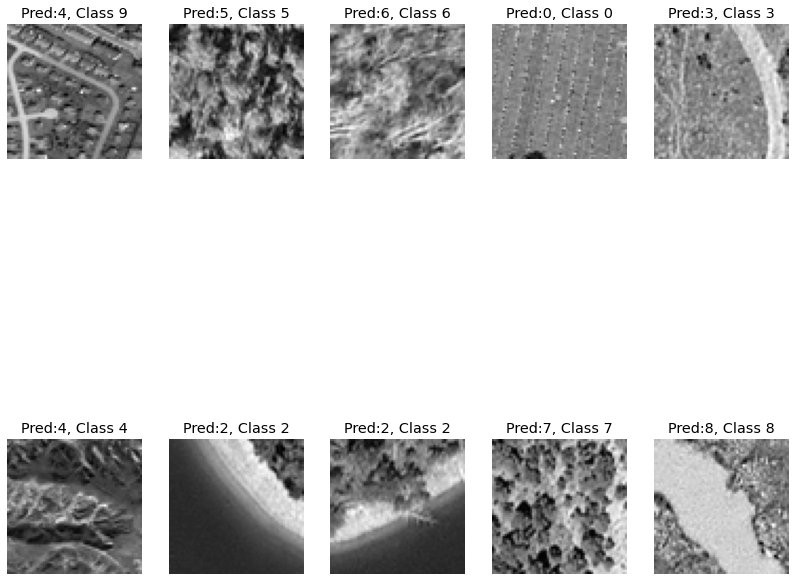

In [ ]:
#Multiple images parameters
import matplotlib.pyplot as plt
w=64
h=64
columns = 5
rows = 2
images = x_test[:10]
print(images.shape)
fig = plt.figure(figsize=(14, 14))
for m in range(1, columns*rows +1):
    img = images[m-1].reshape([64, 64])
    fig.add_subplot(rows, columns, m)
    plt.imshow(img,cmap='gray')
    plt.title("Pred:{}, Class {}".format(pred_labels[m-1], y_true[m-1]))
    #plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.axis('off')
    plt.grid(False)
plt.show()

(2155,) (2155, 10)
Found 1 incorrect labels


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


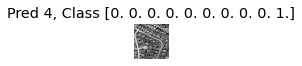

In [ ]:
predicted_classes = model3.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
print(predicted_classes.shape,y_test.shape)
incorrect = np.where(predicted_classes!=y_test)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(64,64), interpolation='none', cmap='gray')
    plt.title("Pred {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.grid(False)
    plt.axis('off')
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


Found 0 correct labels
[4 5 6 0 3 4 2 2 7 8 7 3 5 9 7 3 4 8 6 5 0 0 8 5 3 3 0 2 8 0 8 3 6 6 6 9 8
 9 3 5 6 9 3 5 5 5 3 7 7 4 6 2 9 5 6 7 7 0 6 2 0 0 8 7 2 5 7 8 7 7 7 7 6 8
 5 0 3 3 6 3 6 5 3 4 5 3 0 6 8 8 2 9 2 9 2 7 5 2 4 7]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 

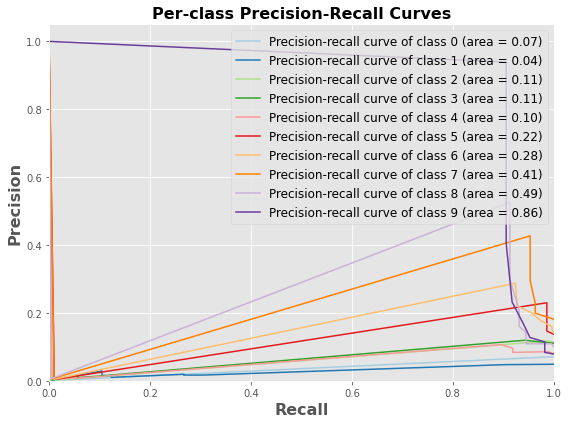

In [ ]:
correct = np.where(predicted_classes==y_test)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(64,64), interpolation='none', cmap='gray')
    plt.title("Pred {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.grid(False)
    plt.axis('off')
    plt.tight_layout()
print(predicted_classes[0:100])
print(y_test[0:100])
from sklearn.metrics import precision_recall_curve, average_precision_score
precision = dict()
recall = dict()
average_precision = dict()
for i in range(10):
    t = y_test[:, i]
    s = y_pred
    precision[i], recall[i], _ = precision_recall_curve(t, s)
    average_precision[i] = average_precision_score(t, s)
# Plot Precision-Recall curve for each class
colors = ('#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928')
fig, ax = plt.subplots(figsize=(8,6))
#ax.set_axis_bgcolor('white')
for cl, co in zip(range(10), colors):
    plt.plot(recall[cl], precision[cl], color=co,
             label='Precision-recall curve of class {} (area = {:.2f})'.format(cl, average_precision[cl]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', size=16, weight='bold')
plt.ylabel('Precision', size=16, weight='bold')
plt.title('Per-class Precision-Recall Curves', size=16, weight='bold')
plt.legend(loc="upper right", prop={'size':12})
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_value, mae_value = model3.evaluate(x_test, y_testpred, verbose=0)
print("Mean Squared Error (MSE)=",mse_value)
print("Mean Absolute Error (MAE)=",mae_value)
print("Mean Squared Error (MSE)=",mean_squared_error(y_testpred, y_test))
print("Mean Absolute Error (MAE)=",mean_absolute_error(y_testpred, y_test))
print ("R^2 is: \n", r2_score(y_test, y_testpred))
print ('RMSE is: \n', np.sqrt(mean_squared_error(y_test, y_testpred)))

Mean Squared Error (MSE)= 0.0742938295006752
Mean Absolute Error (MAE)= 1.0
Mean Squared Error (MSE)= 0.016183238
Mean Absolute Error (MAE)= 0.020112049
R^2 is: 
 0.7850473504683961
RMSE is: 
 0.12721336


In [ ]:
#Build the model
from keras.applications.resnet import ResNet50

'The first base model used is VGG19. The pretrained weights from the imagenet challenge are used'
#base_model_1 = VGG19(include_top=False,weights='imagenet',input_shape=(64,64,3),classes=n_classes)

'For the 2nd base model we will use Resnet 50 and compare the performance against the previous one.The hypothesis is that Resnet 50 should perform better because of its deeper architecture'
base_model_1 = ResNet50(include_top=False,weights='imagenet',input_shape=(64,64,3),classes=n_classes)

#Lets add the final layers to these base models where the actual classification is done in the dense layers

model_1= Sequential()
model_1.add(base_model_1) #Adds the base model (in this case vgg19 to model_1)
model_1.add(Flatten()) #Since the output before the flatten layer is a matrix we have to use this function to get a vector of the form nX1 to feed it into the fully connected layers

#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(1024,activation=('relu'),input_dim=512))
model_1.add(Dense(512,activation=('relu')))
model_1.add(Dense(256,activation=('relu')))
#model_1.add(Dropout(.3))#Adding a dropout layer that will randomly drop 30% of the weights
model_1.add(Dense(128,activation=('relu')))
#model_1.add(Dropout(.2))
model_1.add(Dense(10,activation=('softmax'))) #This is the classification layer

#Check final model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 1024)              8389632   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1

In [ ]:
from tensorflow.keras.optimizers import Adam
model_1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam( learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",),
               metrics=['accuracy'])
history3 = model_1.fit(x_train, y_train,
          batch_size=32, epochs=100, verbose=1, validation_data=(x_test, y_test))

Epoch 1/100
270/270 [==============================] - 52s 68ms/step - loss: 1.1086 - accuracy: 0.6912 - val_loss: 35.8490 - val_accuracy: 0.1044
Epoch 2/100
270/270 [==============================] - 17s 64ms/step - loss: 0.1834 - accuracy: 0.9564 - val_loss: 46.6096 - val_accuracy: 0.1044
Epoch 3/100
270/270 [==============================] - 17s 64ms/step - loss: 0.0845 - accuracy: 0.9771 - val_loss: 6.3507 - val_accuracy: 0.1629
Epoch 4/100
270/270 [==============================] - 17s 63ms/step - loss: 0.0563 - accuracy: 0.9840 - val_loss: 0.6054 - val_accuracy: 0.8046
Epoch 5/100
270/270 [==============================] - 17s 63ms/step - loss: 0.0402 - accuracy: 0.9885 - val_loss: 0.1265 - val_accuracy: 0.9624
Epoch 6/100
270/270 [==============================] - 17s 64ms/step - loss: 0.0300 - accuracy: 0.9923 - val_loss: 0.1005 - val_accuracy: 0.9708
Epoch 7/100
270/270 [==============================] - 17s 63ms/step - loss: 0.0263 - accuracy: 0.9927 - val_loss: 0.0483 - val_

KeyboardInterrupt: ignored

In [ ]:
loss, accuracy=model_1.evaluate(x_test, y_test, verbose=0)
print(accuracy*100)
print(loss)

76.56612396240234
2.143430709838867


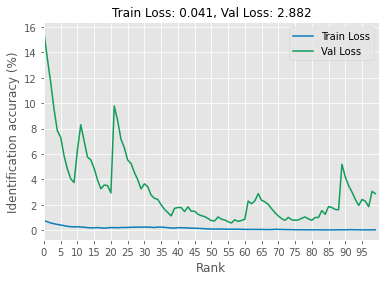

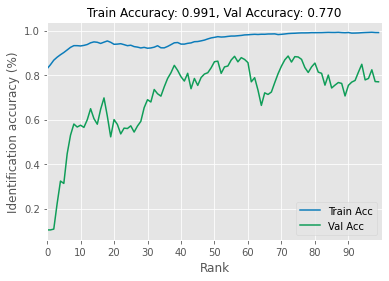

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import os
import pickle
model_1.save('Model_Texture_Resnet.h5')
save_history(history3, 'hist1.bin')
history=load_history('hist1.bin')
plot_compare(history)

findfont: Font family ['Times New Roman Bold'] not found. Falling back to DejaVu Sans.


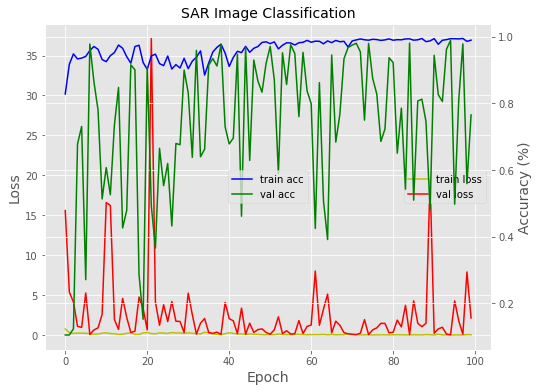

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(8,6))
acc_ax = loss_ax.twinx()

loss_ax.plot(history3.history['loss'], 'y', label='train loss')
loss_ax.plot(history3.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('Epoch',fontname='Times New Roman Bold', fontsize=14)
loss_ax.set_ylabel('Loss',fontname='Times New Roman Bold', fontsize=14)
loss_ax.legend(loc='right')

acc_ax.plot(history3.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history3.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('Accuracy (%)',fontname='Times New Roman Bold', fontsize=14)
acc_ax.set_title('SAR Image Classification',fontname='Times New Roman Bold', fontsize=14)
acc_ax.legend(loc='center')

plt.show()

In [ ]:
def save_history(history, fn):
    with open(fn, 'wb') as fw:
        pickle.dump(history.history, fw, protocol=2)

def load_history(fn):
    class Temp():
        pass
    history = Temp()
    with open(fn, 'rb') as fr:
        history.history = pickle.load(fr)
    return history

def jitter(img, amount=32):
    ox, oy = np.random.randint(-amount, amount+1, 2)
    return np.roll(np.roll(img, ox, -1), oy, -2), ox, oy

def reverse_jitter(img, ox, oy):
    return np.roll(np.roll(img, -ox, -1), -oy, -2)

def plot_image(img):
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')

In [ ]:
def plot_compare(history, steps=-1):
    if steps < 0:
        steps = len(history.history['accuracy'])
    acc = smooth_curve(history.history['accuracy'][:steps])
    val_acc = smooth_curve(history.history['val_accuracy'][:steps])
    loss = smooth_curve(history.history['loss'][:steps])
    val_loss = smooth_curve(history.history['val_loss'][:steps])

    plt.figure(figsize=(6, 4))
    plt.plot(loss, c='#0c7cba', label='Train Loss')
    plt.plot(val_loss, c='#0f9d58', label='Val Loss')
    plt.xticks(range(0, len(loss), 5))
    plt.xlim(0, len(loss))
    plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
    plt.legend()
    plt.ylabel('Identification accuracy (%)')
    plt.xlabel('Rank',)

    plt.figure(figsize=(6, 4))
    plt.plot(acc, c='#0c7cba', label='Train Acc')
    plt.plot(val_acc, c='#0f9d58', label='Val Acc')
    plt.xticks(range(0, len(acc), 10))
    plt.xlim(0, len(acc))
    plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
    plt.legend()
    plt.ylabel('Identification accuracy (%)')
    plt.xlabel('Rank')

In [ ]:
def smooth_curve(points, factor=0.8):
    smoothed = []
    for point in points:
        if smoothed:
            previous = smoothed[-1]
            smoothed.append(previous * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

In [ ]:
from sklearn.metrics import confusion_matrix
y_hat = model_1.predict(x_test)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(y_hat)
print(cm)

[[2.3947287e-08 1.0367914e-08 6.2262268e-10 ... 3.3981348e-15
  3.8621693e-11 5.9110664e-07]
 [2.0143088e-06 7.6066963e-13 9.4307645e-14 ... 2.3413080e-04
  6.8968479e-19 2.3349999e-06]
 [1.0465400e-16 2.9374489e-14 2.5111772e-14 ... 3.7460380e-20
  5.6079494e-16 8.4113112e-11]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.8278740e-22]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.0847282e-06 1.9983407e-04 9.9650168e-01 ... 2.6556548e-12
  1.2119218e-06 5.8126381e-10]]
[[115  22  11   0   0   0   0   0   5   0]
 [  2  30  73   0   0   0   0   0   0   0]
 [  0   0 225   0   0   0   0   0   0   0]
 [  0   1  28 160   1   0   0   0  20   0]
 [  0  17  16   0 139   0   0   0   1   0]
 [  3   0   0   1   0 289   3   0   0   0]
 [  2  13  95  19  22   0 130   0  22   0]
 [  0   0   0   9   0   1   0 289   2   0]
 [  0   1  57   0   0   0   1   0 160   0]
 [ 12   9   1   0  24   0   0   3   8 113]]


In [ ]:
from sklearn.metrics import jaccard_score
sim1 = jaccard_score(y_true, y_pred, average=None)
sim1

array([0.66860465, 0.17857143, 0.44466403, 0.66945607, 0.63181818,
       0.97306397, 0.42345277, 0.95065789, 0.57761733, 0.66470588])

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.grid(False)
    plt.show()


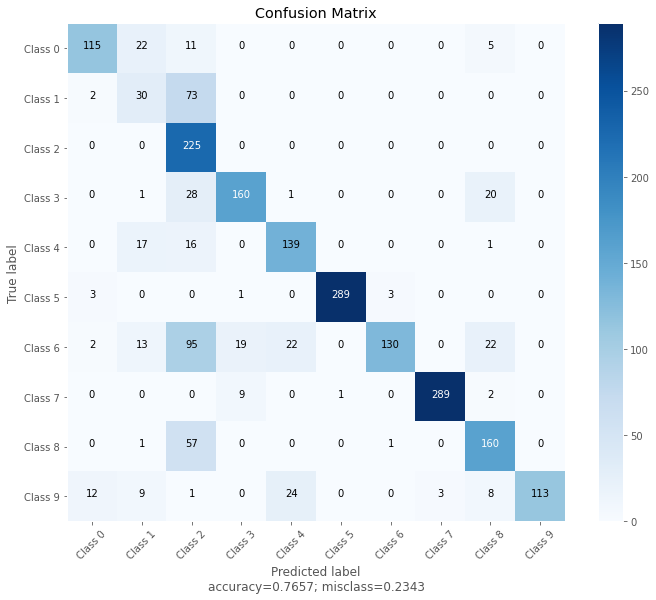

In [ ]:
plot_confusion_matrix(cm,
                      normalize    = False,
                      target_names= ['Class 0','Class 1','Class 2', 'Class 3', 'Class 4', 'Class 5','Class 6','Class 7','Class 8','Class 9'],
                      title        = "Confusion Matrix")

In [ ]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_pred = np.argmax(model_1.predict(x_test), axis=1)
y_true1 = np.argmax(y_test, axis=1)
y_true=y_true1.astype(np.int64)

In [ ]:
target_names= ['Class 0','Class 1','Class 2', 'Class 3', 'Class 4', 'Class 5','Class 6','Class 7','Class 8','Class 9']
print(classification_report(y_true, y_pred,target_names=target_names))
print(confusion_matrix(y_true, y_pred))

              precision    recall  f1-score   support

     Class 0       0.86      0.75      0.80       153
     Class 1       0.32      0.29      0.30       105
     Class 2       0.44      1.00      0.62       225
     Class 3       0.85      0.76      0.80       210
     Class 4       0.75      0.80      0.77       173
     Class 5       1.00      0.98      0.99       296
     Class 6       0.97      0.43      0.59       303
     Class 7       0.99      0.96      0.97       301
     Class 8       0.73      0.73      0.73       219
     Class 9       1.00      0.66      0.80       170

    accuracy                           0.77      2155
   macro avg       0.79      0.74      0.74      2155
weighted avg       0.83      0.77      0.77      2155

[[115  22  11   0   0   0   0   0   5   0]
 [  2  30  73   0   0   0   0   0   0   0]
 [  0   0 225   0   0   0   0   0   0   0]
 [  0   1  28 160   1   0   0   0  20   0]
 [  0  17  16   0 139   0   0   0   1   0]
 [  3   0   0   1   0 289 

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision (micro): %f" % precision_score(y_pred, y_true, average='micro'))
print("Recall (micro):    %f" % recall_score(y_pred, y_true, average='micro'))
print("F1 score (micro):  %f" % f1_score(y_pred, y_true, average='micro'), end='\n\n')

print("Precision (macro): %f" % precision_score(y_pred, y_true, average='macro'))
print("Recall (macro):    %f" % recall_score(y_pred, y_true, average='macro'))
print("F1 score (macro):  %f" % f1_score(y_pred, y_true, average='macro'), end='\n\n')

print("Precision (weighted): %f" % precision_score(y_pred, y_true, average='weighted'))
print("Recall (weighted):    %f" % recall_score(y_pred, y_true, average='weighted'))
print("F1 score (weighted):  %f" % f1_score(y_pred, y_true, average='weighted'),end='\n\n')

from sklearn.metrics import cohen_kappa_score
print("kappa_score(micro): %f" % cohen_kappa_score(y_pred, y_true))
print("kappa_score(macro):    %f" % cohen_kappa_score(y_pred, y_true))
print("kappa_score(weighted):  %f" % cohen_kappa_score(y_pred, y_true))

Precision (micro): 0.765661
Recall (micro):    0.765661
F1 score (micro):  0.765661

Precision (macro): 0.736355
Recall (macro):    0.790970
F1 score (macro):  0.738327

Precision (weighted): 0.826965
Recall (weighted):    0.765661
F1 score (weighted):  0.762379

kappa_score(micro): 0.737560
kappa_score(macro):    0.737560
kappa_score(weighted):  0.737560


In [ ]:
pred_labels = []
for i in range(25):
    r = np.round(np.array(np.exp(y_hat[i])/sum(np.exp(y_hat[i]))),1).argmax()
    print(r)
    if r ==0 : pred_labels.append("0")
    elif r ==1: pred_labels.append("1")
    elif r ==2: pred_labels.append("2")
    elif r ==3: pred_labels.append("3")
    elif r ==4: pred_labels.append("4")
    elif r ==5: pred_labels.append("5")
    elif r ==6: pred_labels.append("6")
    elif r ==7: pred_labels.append("7")
    elif r ==8: pred_labels.append("8")
    elif r ==9: pred_labels.append("9")

4
5
4
0
2
1
2
2
7
2
7
3
5
9
7
3
4
8
2
5
0
1
2
5
3


In [ ]:
images = x_test[:25]
print(images.shape)
print(type(images))

(25, 64, 64, 3)
<class 'numpy.ndarray'>


(25, 64, 64, 3)


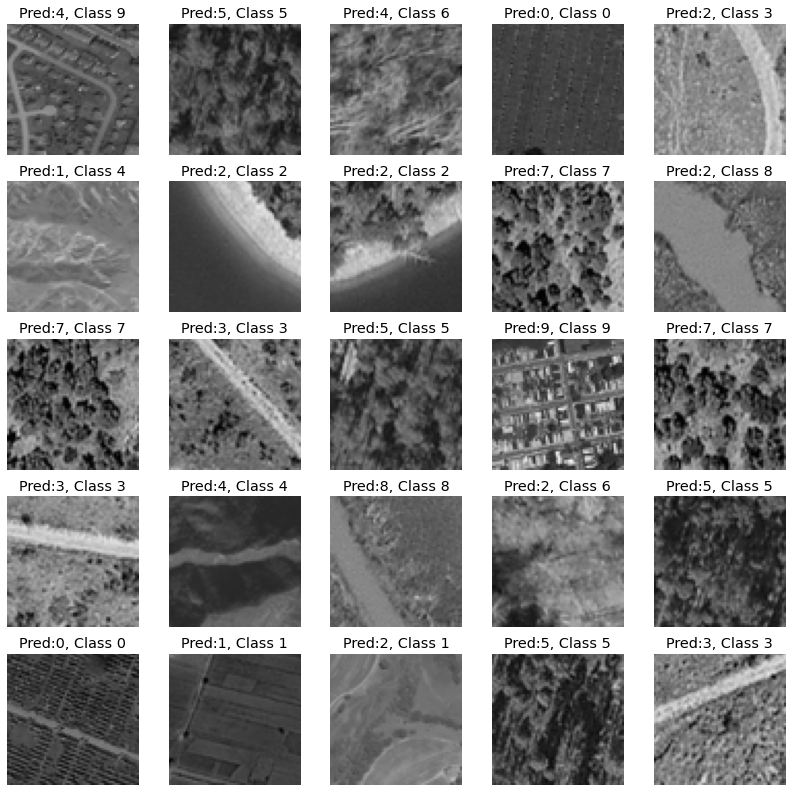

In [ ]:
#Multiple images parameters
import matplotlib.pyplot as plt
w=64
h=64
columns = 5
rows = 5
images = x_test[:25]
print(images.shape)
fig = plt.figure(figsize=(14, 14))
for m in range(1, columns*rows +1):
    img = images[m-1].reshape([64, 64, 3])
    fig.add_subplot(rows, columns, m)
    plt.imshow(img,cmap='gray')
    plt.title("Pred:{}, Class {}".format(pred_labels[m-1], y_true[m-1]))
    #plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.axis('off')
    plt.grid(False)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_value, mae_value = model_1.evaluate(x_test, y_testpred, verbose=0)
print("Mean Squared Error (MSE)=",mse_value)
print("Mean Absolute Error (MAE)=",mae_value)
print("Mean Squared Error (MSE)=",mean_squared_error(y_testpred, y_test))
print("Mean Absolute Error (MAE)=",mean_absolute_error(y_testpred, y_test))
print ("R^2 is: \n", r2_score(y_test, y_testpred))
print ('RMSE is: \n', np.sqrt(mean_squared_error(y_test, y_testpred)))

In [ ]:
import keras
import keras.utils
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers.core import Dense, Activation, Dropout
from keras.regularizers import l1

#import tensorflow_addons as tfa
from keras.models import load_model
model2=Sequential()
model2.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu",input_shape=(64,64,1)))
model2.add(MaxPooling2D(pool_size=(2,2),strides=None, padding="same"))

model2.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation ="relu"))
model2.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation ="relu"))
model2.add(MaxPooling2D(pool_size=(2,2),strides=None, padding="same"))
#model2.add(Dropout(0.20))

model2.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model2.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model2.add(MaxPooling2D(pool_size=(2,2),strides=None, padding="same"))

#model2.add(Dropout(0.20))
model2.add(Flatten())
model2.add(Dense(512,activation="relu"))
#model2.add(Dense(64,activation="relu"))
model2.add(Dense(10,activation="softmax"))

#Model Summary
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       7

In [ ]:
from tensorflow.keras.optimizers import Adam
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam( learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",),
               metrics=['accuracy'])



In [ ]:
history3 = model2.fit(x_train, y_train,
          batch_size=32, epochs=100, verbose=1, validation_data=(x_test, y_test))

Epoch 1/100
270/270 [==============================] - 18s 13ms/step - loss: 1.1377 - accuracy: 0.5769 - val_loss: 0.6116 - val_accuracy: 0.7587
Epoch 2/100
270/270 [==============================] - 3s 11ms/step - loss: 0.5349 - accuracy: 0.8014 - val_loss: 0.5118 - val_accuracy: 0.8265
Epoch 3/100
270/270 [==============================] - 3s 11ms/step - loss: 0.3480 - accuracy: 0.8758 - val_loss: 0.2734 - val_accuracy: 0.8974
Epoch 4/100
270/270 [==============================] - 3s 11ms/step - loss: 0.2531 - accuracy: 0.9102 - val_loss: 0.5486 - val_accuracy: 0.8427
Epoch 5/100
270/270 [==============================] - 3s 11ms/step - loss: 0.1923 - accuracy: 0.9323 - val_loss: 0.2178 - val_accuracy: 0.9230
Epoch 6/100
270/270 [==============================] - 3s 11ms/step - loss: 0.1539 - accuracy: 0.9443 - val_loss: 0.1708 - val_accuracy: 0.9369
Epoch 7/100
270/270 [==============================] - 3s 11ms/step - loss: 0.1456 - accuracy: 0.9501 - val_loss: 0.1971 - val_accuracy

In [ ]:
loss, accuracy=model2.evaluate(x_test, y_test, verbose=0)
print(accuracy*100)
print(loss)

97.44779467582703
0.2351902723312378


In [ ]:
def save_history(history, fn):
    with open(fn, 'wb') as fw:
        pickle.dump(history.history, fw, protocol=2)

def load_history(fn):
    class Temp():
        pass
    history = Temp()
    with open(fn, 'rb') as fr:
        history.history = pickle.load(fr)
    return history

def jitter(img, amount=32):
    ox, oy = np.random.randint(-amount, amount+1, 2)
    return np.roll(np.roll(img, ox, -1), oy, -2), ox, oy

def reverse_jitter(img, ox, oy):
    return np.roll(np.roll(img, -ox, -1), -oy, -2)

def plot_image(img):
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')

In [ ]:
def plot_compare(history, steps=-1):
    if steps < 0:
        steps = len(history.history['accuracy'])
    acc = smooth_curve(history.history['accuracy'][:steps])
    val_acc = smooth_curve(history.history['val_accuracy'][:steps])
    loss = smooth_curve(history.history['loss'][:steps])
    val_loss = smooth_curve(history.history['val_loss'][:steps])

    plt.figure(figsize=(6, 4))
    plt.plot(loss, c='#0c7cba', label='Train Loss')
    plt.plot(val_loss, c='#0f9d58', label='Val Loss')
    plt.xticks(range(0, len(loss), 5))
    plt.xlim(0, len(loss))
    plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
    plt.legend()
    plt.ylabel('Identification accuracy (%)')
    plt.xlabel('Rank',)

    plt.figure(figsize=(6, 4))
    plt.plot(acc, c='#0c7cba', label='Train Acc')
    plt.plot(val_acc, c='#0f9d58', label='Val Acc')
    plt.xticks(range(0, len(acc), 10))
    plt.xlim(0, len(acc))
    plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
    plt.legend()
    plt.ylabel('Identification accuracy (%)')
    plt.xlabel('Rank')

In [ ]:
def smooth_curve(points, factor=0.8):
    smoothed = []
    for point in points:
        if smoothed:
            previous = smoothed[-1]
            smoothed.append(previous * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

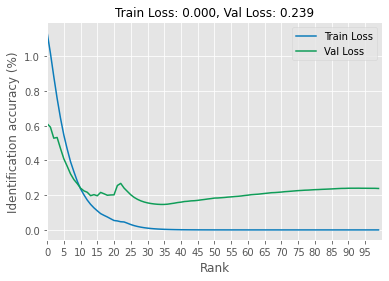

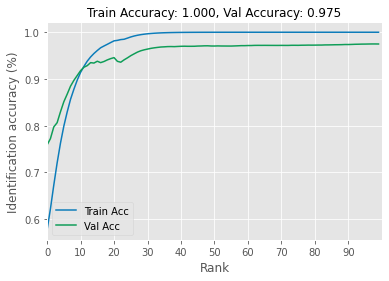

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import os
import pickle
model2.save('Model_Texture_VGG.h5')
save_history(history3, 'hist1.bin')
history=load_history('hist1.bin')
plot_compare(history)

findfont: Font family ['Times New Roman Bold'] not found. Falling back to DejaVu Sans.


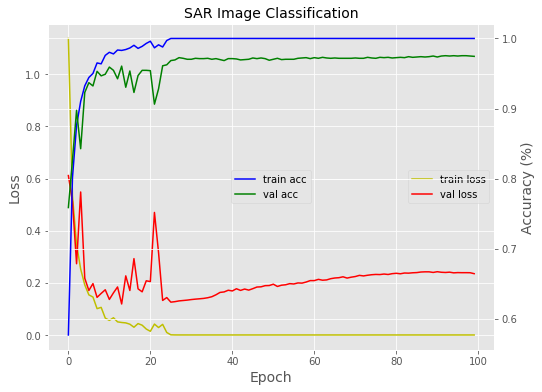

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(8,6))
acc_ax = loss_ax.twinx()

loss_ax.plot(history3.history['loss'], 'y', label='train loss')
loss_ax.plot(history3.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('Epoch',fontname='Times New Roman Bold', fontsize=14)
loss_ax.set_ylabel('Loss',fontname='Times New Roman Bold', fontsize=14)
loss_ax.legend(loc='right')

acc_ax.plot(history3.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history3.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('Accuracy (%)',fontname='Times New Roman Bold', fontsize=14)
acc_ax.set_title('SAR Image Classification',fontname='Times New Roman Bold', fontsize=14)
acc_ax.legend(loc='center')

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
y_hat = model2.predict(x_test)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(y_hat)
print(cm)

[[1.63024080e-17 9.19995286e-21 3.59430979e-29 ... 1.18852424e-21
  3.83469906e-22 9.99898195e-01]
 [2.13757249e-29 0.00000000e+00 0.00000000e+00 ... 1.10356245e-33
  0.00000000e+00 2.19044194e-30]
 [3.69430883e-37 3.38449849e-34 0.00000000e+00 ... 7.81116570e-36
  3.63501252e-35 8.71673567e-23]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.86917941e-38 0.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  4.77016739e-38 0.00000000e+00]
 [2.55581756e-14 1.00000000e+00 6.42460193e-14 ... 2.08159285e-26
  2.57922674e-17 1.87015684e-15]]
[[147   4   1   0   1   0   0   0   0   0]
 [  6  92   1   0   4   0   0   0   2   0]
 [  0   2 221   1   0   0   0   0   1   0]
 [  0   0   3 202   2   0   3   0   0   0]
 [  1   3   0   3 163   0   1   0   0   2]
 [  0   0   0   0   0 295   1   0   0   0]
 [  0   0   0   0   0   0 303   0   0   0]
 [  0   0   0   5   0   0   0 295   0   1]
 [  0   0   0   0   4   0   1   0 214   0]
 [  0   0   0

In [ ]:
from sklearn.metrics import jaccard_score
sim1 = jaccard_score(y_true, y_pred, average=None)
sim1

array([0.91875   , 0.80701754, 0.96086957, 0.92237443, 0.88108108,
       0.99662162, 0.97741935, 0.98006645, 0.96396396, 0.97109827])

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.grid(False)
    plt.show()


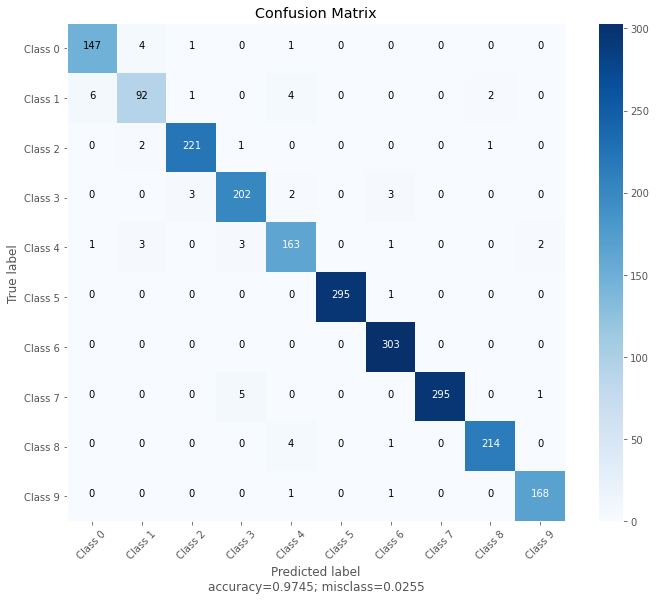

In [ ]:
plot_confusion_matrix(cm,
                      normalize    = False,
                      target_names= ['Class 0','Class 1','Class 2', 'Class 3', 'Class 4', 'Class 5','Class 6','Class 7','Class 8','Class 9'],
                      title        = "Confusion Matrix")

In [ ]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_pred = np.argmax(model2.predict(x_test), axis=1)
y_true1 = np.argmax(y_test, axis=1)
y_true=y_true1.astype(np.int64)

In [ ]:
target_names= ['Class 0','Class 1','Class 2', 'Class 3', 'Class 4', 'Class 5','Class 6','Class 7','Class 8','Class 9']
print(classification_report(y_true, y_pred,target_names=target_names))
print(confusion_matrix(y_true, y_pred))

              precision    recall  f1-score   support

     Class 0       0.95      0.96      0.96       153
     Class 1       0.91      0.88      0.89       105
     Class 2       0.98      0.98      0.98       225
     Class 3       0.96      0.96      0.96       210
     Class 4       0.93      0.94      0.94       173
     Class 5       1.00      1.00      1.00       296
     Class 6       0.98      1.00      0.99       303
     Class 7       1.00      0.98      0.99       301
     Class 8       0.99      0.98      0.98       219
     Class 9       0.98      0.99      0.99       170

    accuracy                           0.97      2155
   macro avg       0.97      0.97      0.97      2155
weighted avg       0.97      0.97      0.97      2155

[[147   4   1   0   1   0   0   0   0   0]
 [  6  92   1   0   4   0   0   0   2   0]
 [  0   2 221   1   0   0   0   0   1   0]
 [  0   0   3 202   2   0   3   0   0   0]
 [  1   3   0   3 163   0   1   0   0   2]
 [  0   0   0   0   0 295 

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision (micro): %f" % precision_score(y_pred, y_true, average='micro'))
print("Recall (micro):    %f" % recall_score(y_pred, y_true, average='micro'))
print("F1 score (micro):  %f" % f1_score(y_pred, y_true, average='micro'), end='\n\n')

print("Precision (macro): %f" % precision_score(y_pred, y_true, average='macro'))
print("Recall (macro):    %f" % recall_score(y_pred, y_true, average='macro'))
print("F1 score (macro):  %f" % f1_score(y_pred, y_true, average='macro'), end='\n\n')

print("Precision (weighted): %f" % precision_score(y_pred, y_true, average='weighted'))
print("Recall (weighted):    %f" % recall_score(y_pred, y_true, average='weighted'))
print("F1 score (weighted):  %f" % f1_score(y_pred, y_true, average='weighted'),end='\n\n')

from sklearn.metrics import cohen_kappa_score
print("kappa_score(micro): %f" % cohen_kappa_score(y_pred, y_true))
print("kappa_score(macro):    %f" % cohen_kappa_score(y_pred, y_true))
print("kappa_score(weighted):  %f" % cohen_kappa_score(y_pred, y_true))

Precision (micro): 0.974478
Recall (micro):    0.974478
F1 score (micro):  0.974478

Precision (macro): 0.966539
Recall (macro):    0.967814
F1 score (macro):  0.967111

Precision (weighted): 0.974683
Recall (weighted):    0.974478
F1 score (weighted):  0.974525

kappa_score(micro): 0.971355
kappa_score(macro):    0.971355
kappa_score(weighted):  0.971355


In [ ]:
score1 = model2.evaluate(x_test, y_test,verbose=1)

print(score1)

y_testpred = model2.predict(x_test)
for i in range(25):
    r = np.round(np.array(np.exp(y_hat[i])/sum(np.exp(y_hat[i]))),1).argmax()
    print(r)
    if r ==0 : pred_labels.append("0")
    elif r ==1: pred_labels.append("1")
    elif r ==2: pred_labels.append("2")
    elif r ==3: pred_labels.append("3")
    elif r ==4: pred_labels.append("4")
    elif r ==5: pred_labels.append("5")
    elif r ==6: pred_labels.append("6")
    elif r ==7: pred_labels.append("7")
    elif r ==8: pred_labels.append("8")
    elif r ==9: pred_labels.append("9")

68/68 [==============================] - 1s 7ms/step - loss: 0.2352 - accuracy: 0.9745
[0.2351902723312378, 0.9744779467582703]
9
5
6
0
3
4
2
2
7
8
7
3
5
9
7
3
4
8
6
5
0
1
4
5
3


In [ ]:
images = x_test[:25]
print(images.shape)
print(type(images))

(25, 64, 64, 1)
<class 'numpy.ndarray'>


(25, 64, 64, 1)


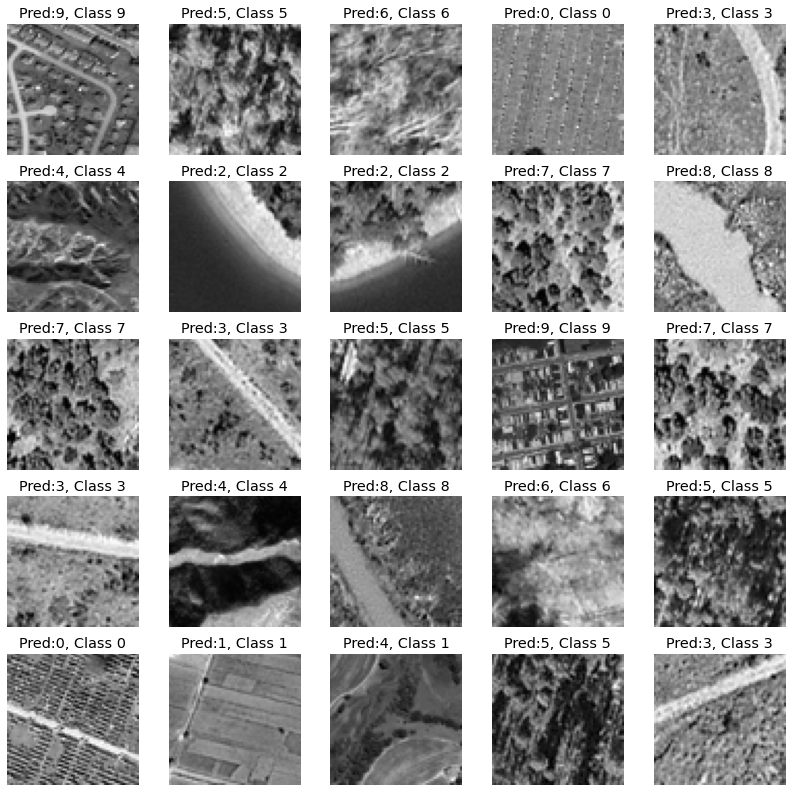

In [ ]:
#Multiple images parameters
import matplotlib.pyplot as plt
w=64
h=64
columns = 5
rows = 5
images = x_test[:25]
print(images.shape)
fig = plt.figure(figsize=(14, 14))
for m in range(1, columns*rows +1):
    img = images[m-1].reshape([64, 64])
    fig.add_subplot(rows, columns, m)
    plt.imshow(img,cmap='gray')
    plt.title("Pred:{}, Class {}".format(pred_labels[m-1], y_true[m-1]))
    #plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.axis('off')
    plt.grid(False)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_value, mae_value = model2.evaluate(x_test, y_testpred, verbose=0)
print("Mean Squared Error (MSE)=",mse_value)
print("Mean Absolute Error (MAE)=",mae_value)
print("Mean Squared Error (MSE)=",mean_squared_error(y_testpred, y_test))
print("Mean Absolute Error (MAE)=",mean_absolute_error(y_testpred, y_test))
print ("R^2 is: \n", r2_score(y_test, y_testpred))
print ('RMSE is: \n', np.sqrt(mean_squared_error(y_test, y_testpred)))

Mean Squared Error (MSE)= 0.011210480704903603
Mean Absolute Error (MAE)= 1.0
Mean Squared Error (MSE)= 0.0045600147
Mean Absolute Error (MAE)= 0.0052274163
R^2 is: 
 0.9366862005464341
RMSE is: 
 0.06752788
